# **Exploratory Data Analysis On Los-Angeles-Crime-Dataset-2020-Present**


![Image](https://i.imgur.com/6431X2S.png)

### About DataSet

__This Dataset contains all of the recorded crime data in the city of Los Angeles between the years of 2020 to the Present Day(2023), it has more than 7,00,000 of records and 28 columns . The dataset contains everything from the time the crime was reported, the type of crime committed, as well as the longitude and latitude which the crime was committed.__
Source of the Datset is Kaggle.

It contains a single CSV file:-
"Crime_Data_from_2020_to_Present.csv"

Following are the Columns of the DataSet:-

__'DR_NO'__:- Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits.

__'Date Rptd'__ :- Date of Crime Reported On(YYYY-MM-DD)

__'DATE OCC'__ :- Date of crime occurrence(YYYY-MM-DD)

__'TIME OCC'__ :- Time in hh:mm, Time of crime occured

__'AREA'__ :- The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

__'AREA NAME'__ :- The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for.

__'Rpt Dist No'__ :- Code that represents a sub-area within a Geographic Area.

__'Crm Cd'__ :- Indicates the crime code.

__'Crm Cd Desc'__ :- Defines the Crime Code provided.

__'Mocodes'__ :-Model Penal Code (MPC) is a set of penal codes that are used in the United States. A penal code is a set of laws regarding crimes.

__'Vict Age'__ :-Indicates the age of the victim.

__'Vict Sex'__ :- F: Female M: Male X: Unknown

__'Vict Descent'__ :- Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

__'Premis Cd'__ : - The type of structure, vehicle, or location where the crime took place.

__'Premis Desc'__ :- Defines the Premise Code provided.

__'Weapon Used Cd'__ :- The type of weapon used in the crime.

__'Weapon Desc'__ :- Defines the Weapon Used Code provided.

__'Status'__ :- AO/IC means the entire complex of organizational measures that directly or indirectly relates to the proper functioning of the administration.

__'Status Desc'__ :- Defines the Status

__'LOCATION'__ :- Street address of crime incident rounded to the nearest hundred block to maintain anonymity.

__'LAT'__ :- Latitude Coordinate.

__'LON'__ :- Longitude Coordinate.


__Exploratory Data Analysis (EDA)__, It's a process where you explore and analyze a dataset to understand its main characteristics and patterns. EDA helps you uncover important insights, spot anomalies, and prepare your data for further analysis. You can use various techniques like visualizations, summary statistics, and data manipulation to perform EDA. It's like investigating the data to find out what it can tell you.

Steps involved in EDA:

The process of EDA typically involves following steps:

- Downloading a dataset from online source
- Data cleaning and preprocessing
- Data analysis and visualization
- Asking interesting questions and answering
- Conclusion

Use the "Run" button to execute the code.

### Importing the Essential Librarries

In [ ]:
!pip install jovian --upgrade --quiet
!pip install opendatasets --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import jovian
import math
import random
import opendatasets as od

# User interact with the native OS Python is currently running on
import os

# Import python data analysis libraries
import pandas as pd
import numpy as np

# Import library to download data from Kaggle
import opendatasets as od

# Import visualisation libraries
import folium
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px
from pylab import rcParams

# Set plot parameters for the notebook
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.facecolor'] = '#00000000'

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

## Download the Dataset

In [ ]:
#assigning url to variable
dataset_url = 'https://www.kaggle.com/datasets/nathaniellybrand/los-angeles-crime-dataset-2020-present'

# downloading the data using od.download
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pragyakaurava
Your Kaggle Key: ··········


100%|██████████| 37.0M/37.0M [00:02<00:00, 16.7MB/s]


In [ ]:
#Following is the directory in which our Dataset is stored
data_dir = 'los-angeles-crime-dataset-2020-present'

In [ ]:
#the listdir fuction will list out all the files present in the given Directory
os.listdir(data_dir)

['Crime_Data_from_2020_to_Present.csv']

## Data Preparation and cleaning

1. Load the file using Pandas
2. Look at some info about the data and the cols
3. Downcasting

In [ ]:
!ls -lh ./los-angeles-crime-dataset-2020-present

total 184M
-rw-r--r-- 1 root root 184M Jul 24 16:31 Crime_Data_from_2020_to_Present.csv


In [ ]:
#creating Dataframe from csv, using Pandas
crime_raw_df = pd.read_csv(data_dir + '/Crime_Data_from_2020_to_Present.csv')

In [ ]:
crime_raw_df

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2       200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200   
3       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
4       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
...           ...                     ...                     ...       ...   
752906  231510379  05/29/2023 12:00:00 AM  05/25/2023 12:00:00 AM      1100   
752907  231604807  01/27/2023 12:00:00 AM  01/26/2023 12:00:00 AM      1800   
752908  231606525  03/22/2023 12:00:00 AM  03/22/2023 12:00:00 AM      1000   
752909  231210064  04/12/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1630   
752910  230906458  03/05/2023 12:00:00 AM  03/05/2023 12:00:00 AM       900   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0          3    Southwest          377         2     624   
1          1      Central          163         2     624   
2          1      Central          155         2     845   
3         15  N Hollywood         1543         2     745   
4         19      Mission         1998         2     740   
...      ...          ...          ...       ...     ...   
752906    15  N Hollywood         1548         2     662   
752907    16     Foothill         1663         2     740   
752908    16     Foothill         1602         1     230   
752909    12  77th Street         1239         1     230   
752910     9     Van Nuys          914         2     745   

                                              Crm Cd Desc  ... Status  \
0                                BATTERY - SIMPLE ASSAULT  ...     AO   
1                                BATTERY - SIMPLE ASSAULT  ...     IC   
2               SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
...                                                   ...  ...    ...   
752906                                 BUNCO, GRAND THEFT  ...     IC   
752907  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
752908     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC   
752909     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC   
752910           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   

         Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0        Adult Other    624.0      NaN       NaN      NaN   
1        Invest Cont    624.0      NaN       NaN      NaN   
2       Adult Arrest    845.0      NaN       NaN      NaN   
3        Invest Cont    745.0    998.0       NaN      NaN   
4        Invest Cont    740.0      NaN       NaN      NaN   
...              ...      ...      ...       ...      ...   
752906   Invest Cont    662.0      NaN       NaN      NaN   
752907   Invest Cont    740.0      NaN       NaN      NaN   
752908   Invest Cont    230.0      NaN       NaN      NaN   
752909   Invest Cont    230.0      NaN       NaN      NaN   
752910   Invest Cont    745.0      NaN       NaN      NaN   

                                        LOCATION Cross Street      LAT  \
0        1100 W  39TH                         PL          NaN  34.0141   
1         700 S  HILL                         ST          NaN  34.0459   
2         200 E  6TH                          ST          NaN  34.0448   
3        5400    CORTEEN                      PL          NaN  34.1685   
4       14400    TITUS                        ST          NaN  34.2198   
...                                          ...          ...      ...   
752906   5300    DENNY                        AV          NaN  34.1667   
752907  12500    BRANFORD                     ST          NaN  34.2466   
752908  12800    FILMORE                      ST          NaN  34.

In Total the DataFrame consist of 752911 rows × 28 columns

Let's view the list of columns in the data frame.

In [ ]:
crime_raw_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

### Picking a Sample

Explore faster loading and lesser memory by downcasting the dtype and loading required columns

In [ ]:
crime_raw_df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

As we can see there are few Datatypes which are taking too much space, so we will perform downcasting. And will select only the columns on which we will perform analysis.

In [ ]:
%%time

selected_cols = ["Date Rptd", "DATE OCC", "TIME OCC", "AREA NAME", "Rpt Dist No", "Crm Cd", "Crm Cd Desc", "Vict Age", "Vict Sex",
                 "Premis Desc", "Weapon Desc", "Status Desc", "LOCATION", "LAT", "LON"]
selected_dtypes ={"TIME OCC" : "int16", "Rpt Dist No" : "int16", "Crm Cd" : "int16" , "Vict Age" : "int16",
                  "LAT" : "float32", "LON" : "float32"}
crime_raw_df = pd.read_csv(data_dir + '/Crime_Data_from_2020_to_Present.csv', usecols = selected_cols, dtype = selected_dtypes)

CPU times: user 2.8 s, sys: 184 ms, total: 2.98 s
Wall time: 3 s


As most of the column names are not appropriate so let's rename them.

In [ ]:
crime_raw_df.rename(columns = {"Date Rptd" : "Date_Reported", "DATE OCC" : "Date_Of_Occurance", "TIME OCC" : "Time_Of_Occurance",
                               "AREA NAME" : "Area_Name" , "Rpt Dist No" : "Reported_Distt_No", "Crm Cd" : "Crime_Code",
                               "Crm Cd Desc" : "Crime_Code_Desc", "Vict Age" : "Victim_Age", "Vict Sex" : "Victim_Sex",
                               "Premis Desc" : "Premis_Desc", "Weapon Desc" : "Weapon_Desc", "Status Desc" : "Status_Desc", "LOCATION" : "Location",
                               "LAT" : "Latitude", "LON" : "Longitude"}, inplace = True)

In [ ]:
# This is our raw df with 15 columns now
crime_raw_df.head(10)

Date_Reported       Date_Of_Occurance  Time_Of_Occurance  \
0  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM               2230   
1  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM                330   
2  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM               1200   
3  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM               1730   
4  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM                415   
5  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM                 30   
6  01/02/2020 12:00:00 AM  01/02/2020 12:00:00 AM               1315   
7  01/04/2020 12:00:00 AM  01/04/2020 12:00:00 AM                 40   
8  01/04/2020 12:00:00 AM  01/04/2020 12:00:00 AM                200   
9  06/19/2020 12:00:00 AM  05/26/2020 12:00:00 AM               1925   

     Area_Name  Reported_Distt_No  Crime_Code  \
0    Southwest                377         624   
1      Central                163         624   
2      Central                155         845   
3  N Hollywood               1543         745   
4      Mission               1998         740   
5      Central                163         121   
6      Central                161         442   
7      Central                155         946   
8      Central                101         341   
9   Devonshire               1708         341   

                                     Crime_Code_Desc  Victim_Age Victim_Sex  \
0                           BATTERY - SIMPLE ASSAULT          36          F   
1                           BATTERY - SIMPLE ASSAULT          25          M   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE           0          X   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)          76          F   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...          31          X   
5                                     RAPE, FORCIBLE          25          F   
6           SHOPLIFTING - PETTY THEFT ($950 & UNDER)          23          M   
7                          OTHER MISCELLANEOUS CRIME           0          X   
8  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...          23          M   
9  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...           0          X   

                                    Premis_Desc  \
0                        SINGLE FAMILY DWELLING   
1                                      SIDEWALK   
2                               POLICE FACILITY   
3  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
4                           BEAUTY SUPPLY STORE   
5               NIGHT CLUB (OPEN EVENINGS ONLY)   
6                              DEPARTMENT STORE   
7                               POLICE FACILITY   
8  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
9                                OTHER BUSINESS   

                                      Weapon_Desc   Status_Desc  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   Adult Other   
1                     UNKNOWN WEAPON/OTHER WEAPON   Invest Cont   
2                                             NaN  Adult Arrest   
3                                             NaN   Invest Cont   
4                                             NaN   Invest Cont   
5                     UNKNOWN WEAPON/OTHER WEAPON   Invest Cont   
6                                             NaN   Invest Cont   
7                                             NaN   Invest Cont   
8                                             NaN   Invest Cont   
9                                             NaN   Adult Other   

                                   Location   Latitude   Longitude  
0   1100 W  39TH                         PL  34.014099 -118.297798  
1    700 S  HILL                         ST  34.045898 -118.254501  
2    200 E  6TH                          ST  34.044800 -118.247398  
3   5400    CORTEEN                      PL  34.168499 -118.401901  
4  14400    TITUS                        ST  34.219799 -118.446800  
5                           700 S  BROADWAY  34.045200 -118.253403  
6    700 S  FIGUEROA      

In [ ]:
# Let's check the changed datatypes also
crime_raw_df.dtypes

Date_Reported         object
Date_Of_Occurance     object
Time_Of_Occurance      int16
Area_Name             object
Reported_Distt_No      int16
Crime_Code             int16
Crime_Code_Desc       object
Victim_Age             int16
Victim_Sex            object
Premis_Desc           object
Weapon_Desc           object
Status_Desc           object
Location              object
Latitude             float32
Longitude            float32
dtype: object

In [ ]:
# Changing Dates columns into DateTime datatype
crime_raw_df['Date_Reported'] = pd.to_datetime(crime_raw_df['Date_Reported'])
crime_raw_df['Date_Of_Occurance'] = pd.to_datetime(crime_raw_df['Date_Of_Occurance'])


In [ ]:
# we  can either work on a sample of this data to utilize the memory and time
%%time
crime_sample_df=crime_raw_df.sample(frac=0.25, random_state=0)

CPU times: user 135 ms, sys: 4.45 ms, total: 140 ms
Wall time: 140 ms


In [ ]:
crime_sample_df

Date_Reported Date_Of_Occurance  Time_Of_Occurance    Area_Name  \
541478    2022-09-26        2022-09-24               2130       Harbor   
558071    2022-06-20        2022-06-20               1100  West Valley   
120591    2021-03-11        2020-12-23               1000     Foothill   
350573    2021-12-20        2021-12-19               2047      Pacific   
614560    2022-05-04        2022-05-03                925   Devonshire   
...              ...               ...                ...          ...   
618365    2022-01-14        2022-01-11               1400   Hollenbeck   
64472     2020-09-14        2020-09-14                900      West LA   
488053    2022-12-16        2022-12-16               1400  77th Street   
141497    2020-09-20        2020-09-19               2300      Topanga   
485408    2022-03-30        2022-03-30               1105     Van Nuys   

        Reported_Distt_No  Crime_Code  \
541478                522         331   
558071               1094         310   
120591               1633         956   
350573               1443         956   
614560               1752         810   
...                   ...         ...   
618365                467         740   
64472                 889         901   
488053               1258         626   
141497               2177         928   
485408                974         230   

                                          Crime_Code_Desc  Victim_Age  \
541478  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...          47   
558071                                           BURGLARY          58   
120591            LETTERS, LEWD  -  TELEPHONE CALLS, LEWD          61   
350573            LETTERS, LEWD  -  TELEPHONE CALLS, LEWD          27   
614560  SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...          17   
...                                                   ...         ...   
618365  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...          53   
64472                      VIOLATION OF RESTRAINING ORDER          65   
488053                  INTIMATE PARTNER - SIMPLE ASSAULT          68   
141497                    THREATENING PHONE CALLS/LETTERS          47   
485408     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT          55   

       Victim_Sex                                   Premis_Desc  \
541478          F                                      SIDEWALK   
558071          F                        SINGLE FAMILY DWELLING   
120591          M                        SINGLE FAMILY DWELLING   
350573          F  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
614560          M                                   HIGH SCHOOL   
...           ...                                           ...   
618365          M                        SINGLE FAMILY DWELLING   
64472           M                        SINGLE FAMILY DWELLING   
488053          M                        SINGLE FAMILY DWELLING   
141497          M                                      HOSPITAL   
485408          F                                   PARKING LOT   

                                           Weapon_Desc   Status_Desc  \
541478                                             NaN   Invest Cont   
558071                                             NaN   Invest Cont   
120591                                             NaN   Invest Cont   
350573                                             NaN   Invest Cont   
614560                                             NaN   Invest Cont   
...                                                ...           ...   
618365                                             NaN   Invest Cont   
64472                                              NaN   Invest Cont   
488053  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   Adult Other   
141497                                   VERBAL THREAT   Adult Other   
485408                                         VEHICLE  Adult Arrest   

                                        Location   Latitude   Longitude  
5414

### **Data pre-processing**
### Handling Missing Values

Now that we have loaded the data into a Pandas dataframe, let us process the data for the following

- Merge relavent dataset into one
- drop/impute missing values
- drop duplicates
- check for the outliers


You could analyse the data more to further clean up the data.

In [ ]:
# calculating the no. of missing values and sorting in descending order
crime_raw_df.isnull().sum().sort_values(ascending=False)

Weapon_Desc          491439
Victim_Sex            98230
Premis_Desc             435
Date_Reported             0
Date_Of_Occurance         0
Time_Of_Occurance         0
Area_Name                 0
Reported_Distt_No         0
Crime_Code                0
Crime_Code_Desc           0
Victim_Age                0
Status_Desc               0
Location                  0
Latitude                  0
Longitude                 0
dtype: int64

In [ ]:
# we can display the missing percentage by dividing by the length of the dataframe
missing_df = ( crime_raw_df.isna().sum()/len(crime_raw_df)).sort_values(ascending= False)
missing_df


Weapon_Desc          0.652719
Victim_Sex           0.130467
Premis_Desc          0.000578
Date_Reported        0.000000
Date_Of_Occurance    0.000000
Time_Of_Occurance    0.000000
Area_Name            0.000000
Reported_Distt_No    0.000000
Crime_Code           0.000000
Crime_Code_Desc      0.000000
Victim_Age           0.000000
Status_Desc          0.000000
Location             0.000000
Latitude             0.000000
Longitude            0.000000
dtype: float64

Text(0.5, 1.0, 'Plotting Missing Values')

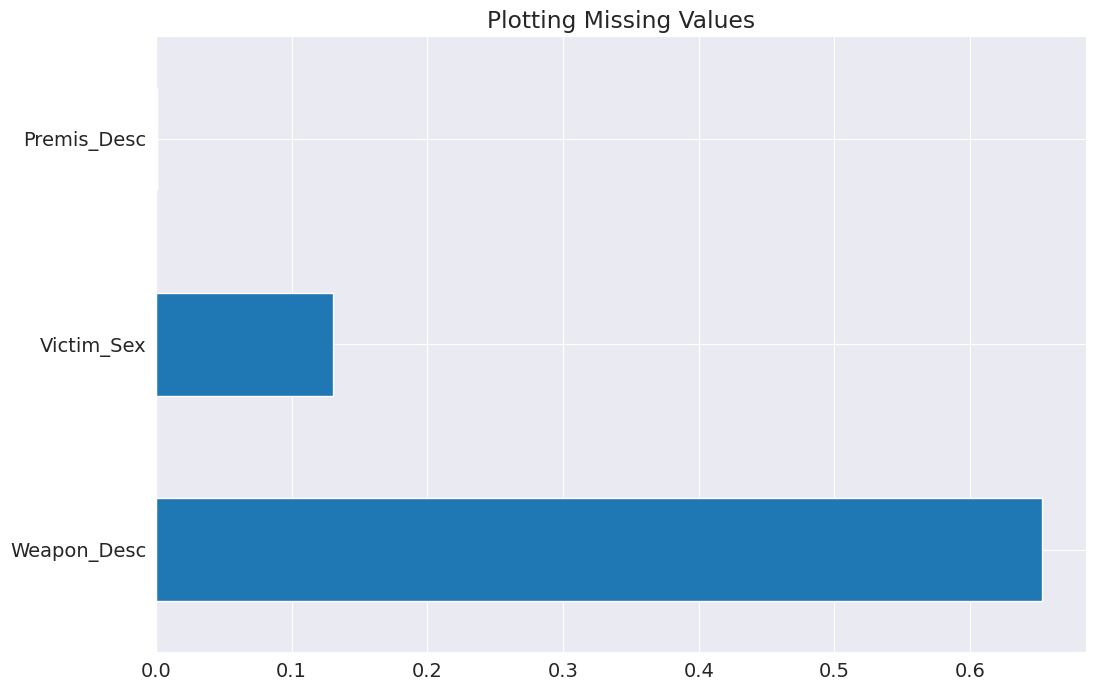

In [ ]:
# Plotting a bar to show the missing values
missing_df[missing_df != 0].plot(kind= 'barh')
plt.title('Plotting Missing Values')

The above bar graph shows Columns Weapon_Desc have the most no. of missing values, and then Victim_Sex and Premis_Desc.

In [ ]:
# We can also calculate the filling factor to fill the missing values
missing_df = crime_raw_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(crime_raw_df.shape[0]-missing_df['missing values'])/crime_raw_df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

variable  missing values  filling factor (%)
0         Weapon_Desc          491439           34.728142
1          Victim_Sex           98230           86.953305
2         Premis_Desc             435           99.942224
3       Date_Reported               0          100.000000
4   Date_Of_Occurance               0          100.000000
5   Time_Of_Occurance               0          100.000000
6           Area_Name               0          100.000000
7   Reported_Distt_No               0          100.000000
8          Crime_Code               0          100.000000
9     Crime_Code_Desc               0          100.000000
10         Victim_Age               0          100.000000
11        Status_Desc               0          100.000000
12           Location               0          100.000000
13           Latitude               0          100.000000
14          Longitude               0          100.000000

In [ ]:
#There are many techniques to handle missing values, out of which I have opted to Drop the missing values.
crime_raw_df.dropna(inplace = True)

In [ ]:
# drop duplicates values
crime_final_df=crime_raw_df.drop_duplicates()

In [ ]:
# Converting the Time_Of_Occurance to get the time in hh:mm form
# Convert the column to string type
crime_final_df['Time_Of_Occurance'] = crime_final_df['Time_Of_Occurance'].astype(str)

# Insert a colon (:) between the hours and minutes positions
crime_final_df['Time_Of_Occurance'] = crime_final_df['Time_Of_Occurance'].str.zfill(4)  # Pad with leading zeros if necessary
crime_final_df['Time_Of_Occurance'] = crime_final_df['Time_Of_Occurance'].str[:2] + ':' + crime_final_df['Time_Of_Occurance'].str[2:]

# Convert the column to datetime type
crime_final_df['Time_Of_Occurance'] = pd.to_datetime(crime_final_df['Time_Of_Occurance'], format='%H:%M', errors='coerce')


In [ ]:
#Since we only need time and not date
crime_final_df['Time_Of_Occurance'] = crime_final_df['Time_Of_Occurance'].dt.time

In [ ]:
#This is how out clean Final Dataframe looks like
crime_final_df

Date_Reported Date_Of_Occurance Time_Of_Occurance    Area_Name  \
0         2020-01-08        2020-01-08          22:30:00    Southwest   
1         2020-01-02        2020-01-01          03:30:00      Central   
5         2020-01-02        2020-01-01          00:30:00      Central   
10        2020-01-04        2020-01-04          22:00:00      Central   
11        2020-01-05        2020-01-05          09:55:00      Central   
...              ...               ...               ...          ...   
752893    2023-06-07        2023-06-07          22:03:00       Newton   
752897    2023-02-05        2023-02-02          18:30:00   Hollenbeck   
752900    2023-05-29        2023-05-29          02:00:00   Devonshire   
752908    2023-03-22        2023-03-22          10:00:00     Foothill   
752909    2023-04-12        2023-04-12          16:30:00  77th Street   

        Reported_Distt_No  Crime_Code  \
0                     377         624   
1                     163         624   
5                     163         121   
10                    192         330   
11                    111         930   
...                   ...         ...   
752893               1322         624   
752897                428         236   
752900               1701         626   
752908               1602         230   
752909               1239         230   

                                       Crime_Code_Desc  Victim_Age Victim_Sex  \
0                             BATTERY - SIMPLE ASSAULT          36          F   
1                             BATTERY - SIMPLE ASSAULT          25          M   
5                                       RAPE, FORCIBLE          25          F   
10                               BURGLARY FROM VEHICLE          29          M   
11              CRIMINAL THREATS - NO WEAPON DISPLAYED          35          M   
...                                                ...         ...        ...   
752893                        BATTERY - SIMPLE ASSAULT          45          F   
752897           INTIMATE PARTNER - AGGRAVATED ASSAULT          41          F   
752900               INTIMATE PARTNER - SIMPLE ASSAULT          27          F   
752908  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT          25          F   
752909  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT          29          M   

                            Premis_Desc  \
0                SINGLE FAMILY DWELLING   
1                              SIDEWALK   
5       NIGHT CLUB (OPEN EVENINGS ONLY)   
10                               STREET   
11                          PARKING LOT   
...                                 ...   
752893                      PARKING LOT   
752897                  OTHER RESIDENCE   
752900           SINGLE FAMILY DWELLING   
752908                         SIDEWALK   
752909                       LAUNDROMAT   

                                           Weapon_Desc  Status_Desc  \
0       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Adult Other   
1                          UNKNOWN WEAPON/OTHER WEAPON  Invest Cont   
5                          UNKNOWN WEAPON/OTHER WEAPON  Invest Cont   
10                                  ROCK/THROWN OBJECT  Invest Cont   
11                                       VERBAL THREAT  Invest Cont   
...                                                ...          ...   
752893                     UNKNOWN WEAPON/OTHER WEAPON  Invest Cont   
752897  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Invest Cont   
752900  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Invest Cont   
752908  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Invest Cont   
752909                     UNKNOWN WEAPON/OTHER WEAPON  Invest Cont   

                                        Location   Latitude   Longitude  
0        1100 W  39TH                         PL  34.014099 -118.297798  
1         700 S  HILL                         ST  34.045898 -118.254501  
5                                700 S  BROADWAY  34.045200 -118.253403 

The final dataframe i.e. __"crime_final_df"__ have now 259479 rows × 15 columns.

In [ ]:
#By using info function we will get the information about its datatypes and non-null values
crime_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259479 entries, 0 to 752909
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_Reported      259479 non-null  datetime64[ns]
 1   Date_Of_Occurance  259479 non-null  datetime64[ns]
 2   Time_Of_Occurance  259479 non-null  object        
 3   Area_Name          259479 non-null  object        
 4   Reported_Distt_No  259479 non-null  int16         
 5   Crime_Code         259479 non-null  int16         
 6   Crime_Code_Desc    259479 non-null  object        
 7   Victim_Age         259479 non-null  int16         
 8   Victim_Sex         259479 non-null  object        
 9   Premis_Desc        259479 non-null  object        
 10  Weapon_Desc        259479 non-null  object        
 11  Status_Desc        259479 non-null  object        
 12  Location           259479 non-null  object        
 13  Latitude           259479 non-null  float32 

**Check for the correlation between the columns using heatmaps**

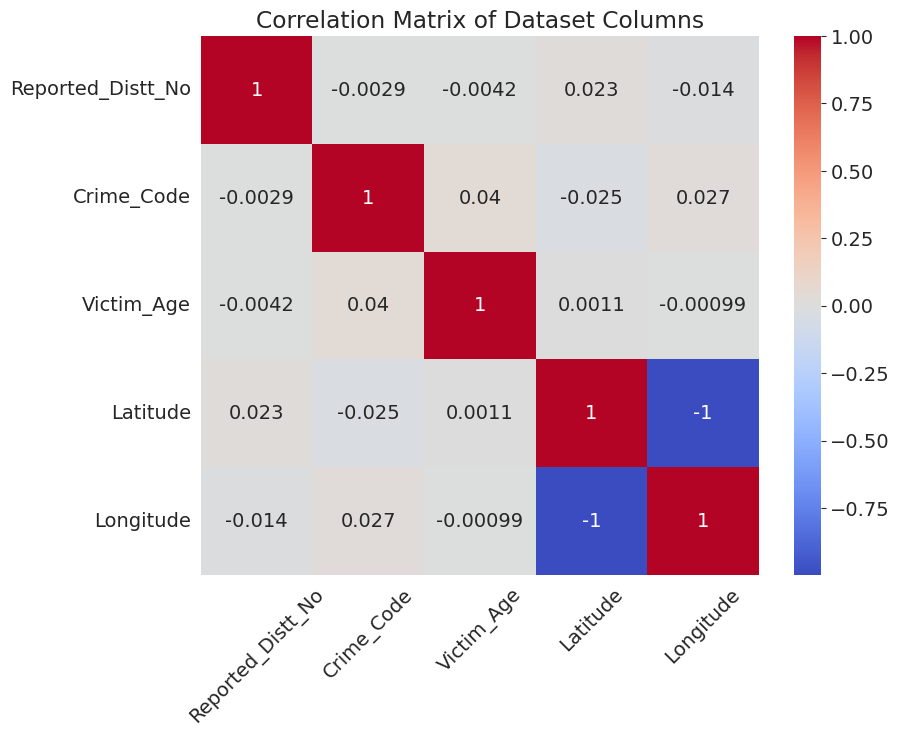

In [ ]:
# Compute the correlation matrix
correlation_matrix = crime_final_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Dataset Columns')
plt.xticks(rotation=45)
plt.show()

Insights:

- The above correlation matrix is a correlation of all the numeric columns of the dataset.
- Here the Darker color indicates Strong correlation between the columns, while the lighter color indicates weaker correlation.



## Exploratory Analysis and Visualization

### Data Analysis and Visualization  

In [ ]:
# Calculating the no. of Numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_crime_df = crime_final_df.select_dtypes(include=numerics)


In [ ]:
numeric_crime_df

Reported_Distt_No  Crime_Code  Victim_Age   Latitude   Longitude
0                     377         624          36  34.014099 -118.297798
1                     163         624          25  34.045898 -118.254501
5                     163         121          25  34.045200 -118.253403
10                    192         330          29  34.035900 -118.264801
11                    111         930          35  34.061501 -118.241203
...                   ...         ...         ...        ...         ...
752893               1322         624          45  34.025398 -118.262901
752897                428         236          41  34.080799 -118.173798
752900               1701         626          27  34.275600 -118.570099
752908               1602         230          25  34.278999 -118.411598
752909               1239         230          29  33.984100 -118.291496

[259479 rows x 5 columns]

Summary Statistics and Sample Data

In [ ]:
#Describe() gets a summary of the main statistics of a dataset.
crime_final_df.describe()

Reported_Distt_No     Crime_Code     Victim_Age       Latitude  \
count      259479.000000  259479.000000  259479.000000  259479.000000   
mean         1096.942940     509.399138      34.640877      33.954025   
std           621.191682     240.551889      17.834831       1.925390   
min           101.000000     110.000000      -2.000000       0.000000   
25%           522.000000     230.000000      24.000000      33.998299   
50%          1162.000000     624.000000      33.000000      34.050701   
75%          1621.000000     626.000000      47.000000      34.121399   
max          2198.000000     956.000000      99.000000      34.334301   

           Longitude  
count  259479.000000  
mean     -117.962585  
std         6.679047  
min      -118.667297  
25%      -118.403297  
50%      -118.304604  
75%      -118.269600  
max         0.000000

*With help of above data we can calculate some interesting values*

In [ ]:
# Calculate Average Age of the Victim
avg_victim_age = crime_final_df['Victim_Age'].mean()
print("Average age of the Victim is :- ",avg_victim_age)

Average age of the Victim is :-  34.640876525653326


In [ ]:
min_victim_age = crime_final_df['Victim_Age'].min()
print("Minimum age of the Victim is :- ",min_victim_age)

Minimum age of the Victim is :-  -2


Insights:
Although this seems a wrong entry, since age can not be in negative. And as this is the only negative entry we can conclude, the reason can be wrong data entry.

In [ ]:
# Total no. of crime reported in the range
start_date = crime_final_df['Date_Reported'].min()
end_date = crime_final_df['Date_Reported'].max()
#Filter the dataframe to include only the rows within the specified date range:
filtered_df = crime_final_df[(crime_final_df['Date_Reported'] >= start_date) & (crime_final_df['Date_Reported'] <= end_date)]
#Get the count of crimes reported within the date range:
crime_count = filtered_df.shape[0]
print("Total No. of crime reported till date :-",crime_count)

Total No. of crime reported till date :- 259479


In [ ]:
#Which year have the highest no. of crime rate
crime_final_df['Year'] = crime_final_df['Date_Reported'].dt.year
crime_count_by_year = crime_final_df['Year'].value_counts()
year_with_highest_crime = crime_count_by_year.idxmax()
print("Highest No. of crime Occured in the Year :- ",year_with_highest_crime)

Highest No. of crime Occured in the Year :-  2022


In [ ]:
#Top 5 Areas with the highest crime rate

area_crime_count = crime_final_df['Area_Name'].value_counts()
sorted_df = area_crime_count.sort_values(ascending=False)
top_5_areas = sorted_df.head(5)
top_5_areas

77th Street    23133
Central        20105
Southeast      18287
Southwest      16019
Hollywood      15781
Name: Area_Name, dtype: int64

Plotting the Crime Locations on a Map based on Latitude and Longitude

In [ ]:
# Since the data is too much to create a map, we will show a sample of it

# Sample a subset of the data
sample_size = min(1000, len(crime_final_df))
sample_data = crime_final_df.sample(n=sample_size, random_state=42)

# Create a map centered around the mean of latitude and longitude
map_crime = folium.Map(location=[sample_data['Latitude'].mean(), sample_data['Longitude'].mean()], zoom_start=10)

# Add markers for each crime location
for index, row in sample_data.iterrows():
    #folium.CircleMarker([row['Latitude'], row['Longitude']], radius=2, color='red', fill=True, fill_color='red').add_to(map_crime)
    folium.Marker([row['Latitude'], row['Longitude']], popup = row['Location']).add_to(map_crime)
# Display the map
map_crime

Insights:-
- Above is the map of Los Angeles City. And the Red dot areas are the place where the crime has occured.

- From the map we can see, The areas and there names where crime has reported.


Analysing Relations between the columns

In [ ]:
# Relation between Crime and Victim Sex

crime_counts = crime_final_df.groupby(['Victim_Sex', 'Crime_Code_Desc']).size().reset_index(name='Count')
crime_counts

Victim_Sex                                    Crime_Code_Desc  Count
0            F                                              ARSON    137
1            F       ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER     51
2            F     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  11452
3            F                                  ATTEMPTED ROBBERY   1014
4            F                           BATTERY - SIMPLE ASSAULT  27861
..         ...                                                ...    ...
296          X                                   VEHICLE - STOLEN      3
297          X  VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...      2
298          X                           VIOLATION OF COURT ORDER      1
299          X                     VIOLATION OF RESTRAINING ORDER      5
300          X                         WEAPONS POSSESSION/BOMBING     17

[301 rows x 3 columns]

In [ ]:
# creating a Pivot table from the crime_counts dataframe
crime_pivot = crime_counts.pivot(index='Victim_Sex', columns='Crime_Code_Desc', values='Count')
print(crime_pivot)

Crime_Code_Desc  ARSON  ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER  \
Victim_Sex                                                             
F                137.0                                          51.0   
H                  NaN                                           1.0   
M                261.0                                         409.0   
X                221.0                                         212.0   

Crime_Code_Desc  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  \
Victim_Sex                                                        
F                                                       11452.0   
H                                                           5.0   
M                                                       30431.0   
X                                                         728.0   

Crime_Code_Desc  ATTEMPTED ROBBERY  BATTERY - SIMPLE ASSAULT  \
Victim_Sex                                                     
F                           1014.0  

__Distribution of crimes by Area__

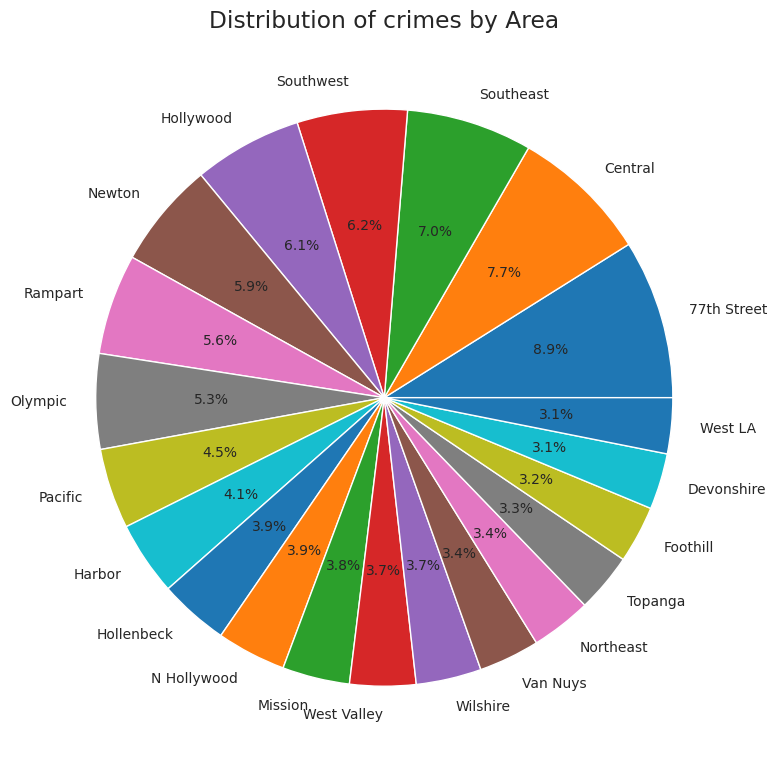

In [ ]:
# Distribution of crimes by Area through Pie Chart
# Grouping the data by "Area_Name" and counting the occurrences
area_counts = crime_final_df['Area_Name'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as per your preference
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', textprops={'fontsize': 10})
plt.title('Distribution of crimes by Area')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()  # Adjusts the spacing to avoid overlapping labels
plt.show()




Insights:-

- Above Pie chart provide us information regarding the percentage of crime by areas.

- We can conclude that most crime happened in 77th Street i.e. 8.9%. Similarly we can check for Less crime area also.

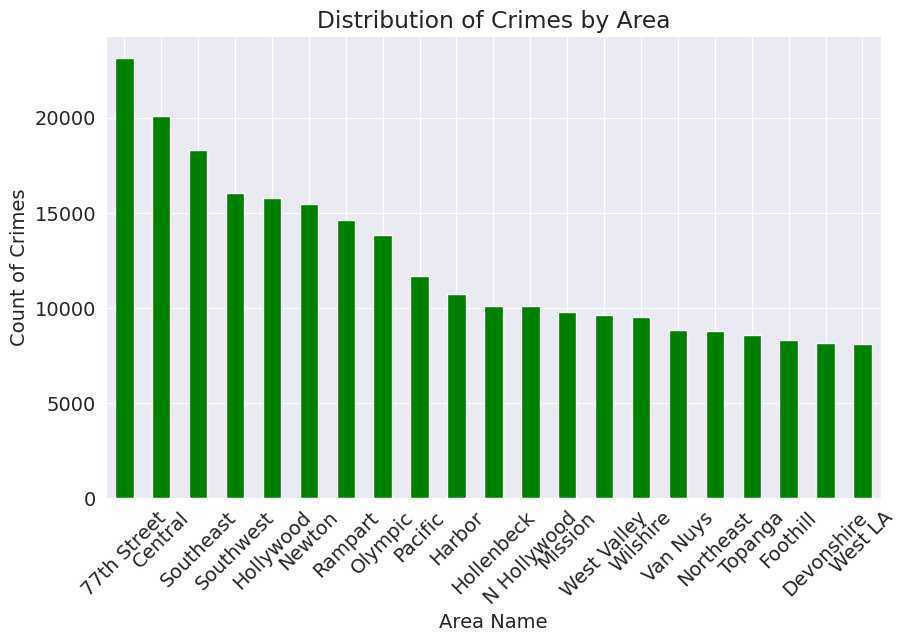

In [ ]:
# Distribution of crimes by Area through Bar Chart
# Calculating the count of crimes by area
area_counts = crime_final_df['Area_Name'].value_counts()

# Creating a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
area_counts.plot(kind='bar', color = 'Green')
plt.xlabel('Area Name')
plt.ylabel('Count of Crimes')
plt.title('Distribution of Crimes by Area')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

Insights:-

- With a Bar Graph we are getting a more clear picture of the areas where crime happened more.

- We can see the Top 5 with highest Crime, and Top 5 with less no. of crime from above visual.

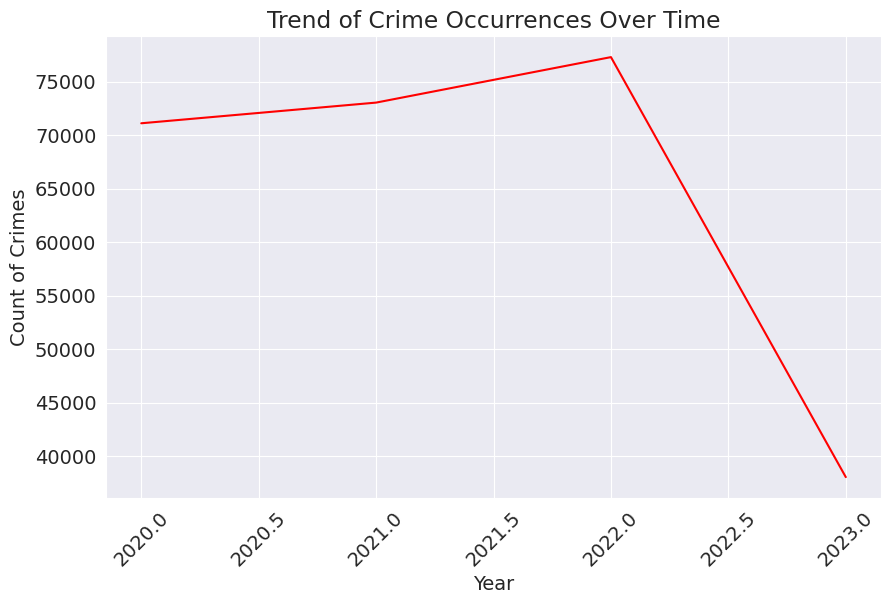

In [ ]:
# Calculating the count of crimes by year
year_counts = crime_final_df['Year'].value_counts().sort_index()

# Creating a line chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
year_counts.plot(kind='line', color = 'Red')
plt.xlabel('Year')
plt.ylabel('Count of Crimes')
plt.title('Trend of Crime Occurrences Over Time')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

#In this example, we calculate the count of crimes for each year using value_counts() on the "Year" column.
#The sort_index() function is used to sort the counts in ascending order based on the year.
#We then create a line chart using the plot() function with kind='line'.
#The x-axis represents the years, and the y-axis represents the count of crimes.
#We also set x-axis label, y-axis label, and a title for the chart.

Insights:-

- From the above Line graph we can see that the crime rate started increasing between 2020, and in 2022 was on its peak.

- Also In stating of 2022, its starts to decrease.

- There can be many reasons for this. One could be, there was Presidential elections going on in USA during that period.

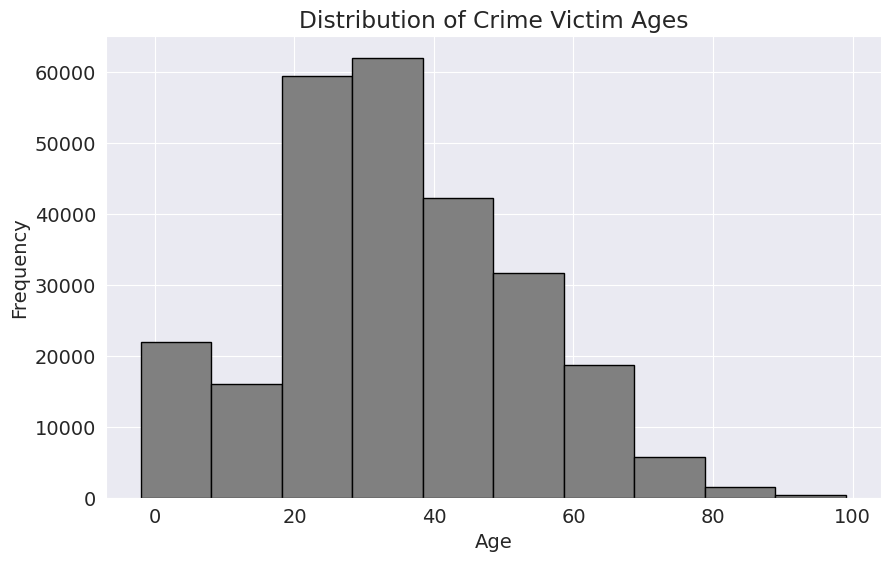

In [ ]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(crime_final_df["Victim_Age"], bins=10, color = 'Grey' ,edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Crime Victim Ages")

# Display the plot
plt.show()

Insights:-

- From the above Histogram, we can see that the age range of 20-40 have the most number of victims.

- The age group 80-100 have less number of victims.

- Even very small age group like 1-10 years, also are the victims with over 20k plus cases. Thats really sad to see.

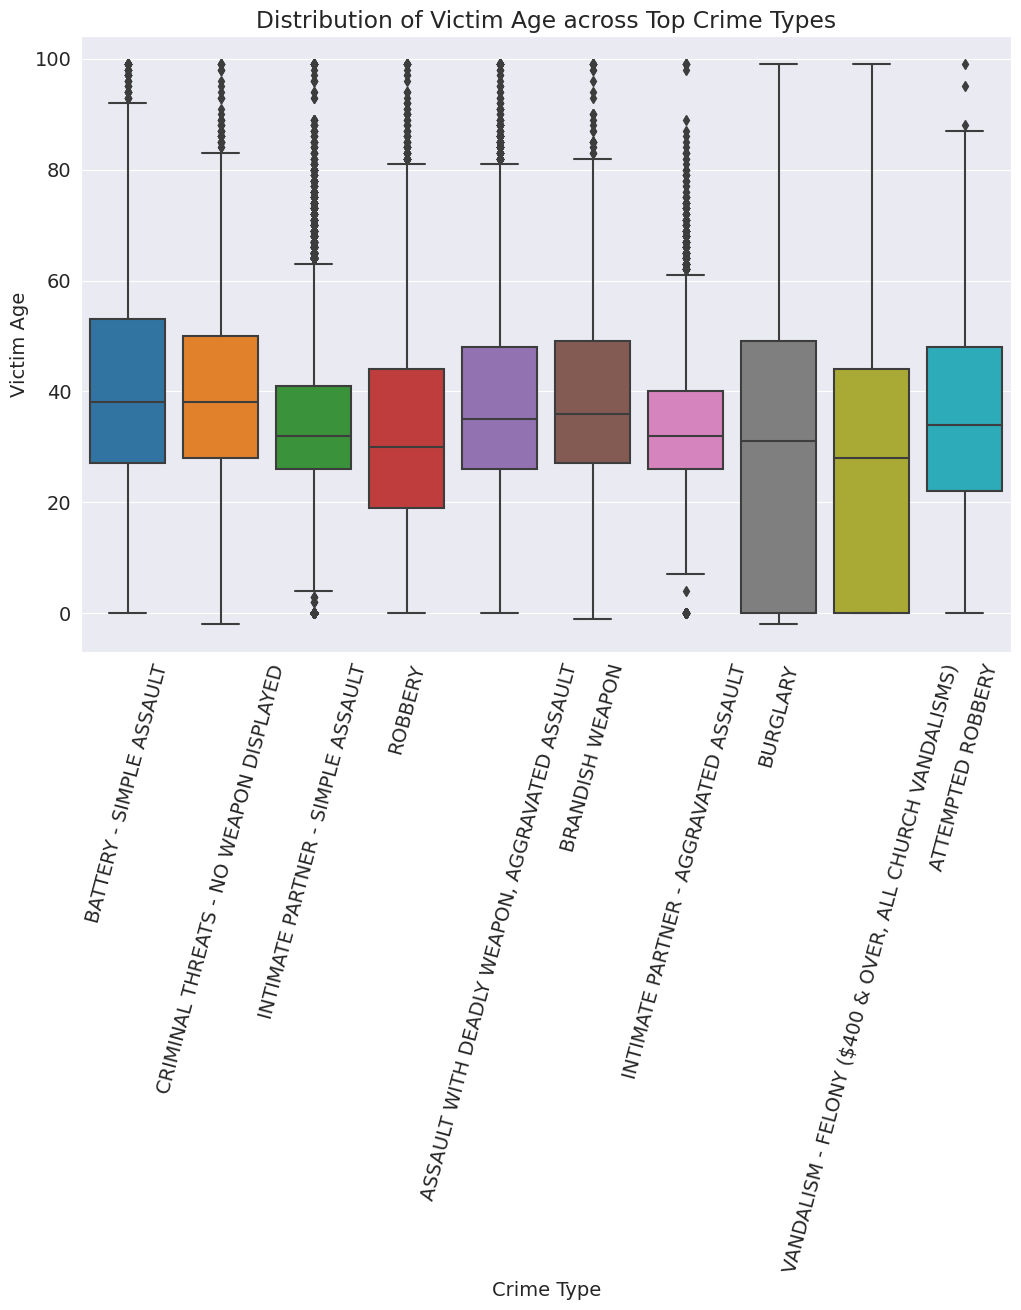

In [ ]:
# Filter the dataframe to include only relevant crime types
top_crime_types = crime_final_df["Crime_Code_Desc"].value_counts().nlargest(10).index
filtered_df = crime_final_df[crime_final_df["Crime_Code_Desc"].isin(top_crime_types)]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x="Crime_Code_Desc", y="Victim_Age", data=filtered_df)
plt.xlabel("Crime Type")
plt.ylabel("Victim Age")
plt.title("Distribution of Victim Age across Top Crime Types")

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Display the plot
plt.show()

Insights:-

- Burgalary is the crime type which happened in large amount with the age group from 1-45 years.

- "Intimate Partner -Simple Assault" and "Intimate Partner -Aggravated Assault" happened between the age group of 25-40.


## Asking and Answering Questions

### Q.1) What is the overall crime rate in the dataset? Can you calculate the total number of crimes reported?

In [ ]:
# Calculate the total number of crimes reported per year
crime_count_by_year = crime_final_df['Year'].value_counts().sort_index()

# Calculate the overall crime rate
overall_crime_rate = crime_count_by_year.sum() / len(crime_count_by_year)

# Print the overall crime rate
print('Overall Crime Rate:', overall_crime_rate)



Overall Crime Rate: 64869.75


In [ ]:
# Calculate the total number of crimes reported
total_crime_count = len(crime_final_df)

# Print the total number of crimes reported
print('Total Number of Crimes Reported:', total_crime_count)

Total Number of Crimes Reported: 259479


Insights:

- *The overall crime rate represents the average number of crimes reported per year in the dataset.*

- *64869.75 no. of cases reports in a year*

- *Total No. of crimes altogether as per our Clean Dataset are :- 2,59,479*

### Q.2) What are the most common types of crimes reported? Can you identify the top 5 or top 10 crimes based on their frequency?

In [ ]:
# Calculate the counts of each crime type
crime_type_counts = crime_final_df['Crime_Code_Desc'].value_counts()

# Print the most common types of crimes reported
print('Most Common Types of Crimes Reported:')
print(crime_type_counts.head())

Most Common Types of Crimes Reported:
BATTERY - SIMPLE ASSAULT                          59365
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    42616
INTIMATE PARTNER - SIMPLE ASSAULT                 37818
ROBBERY                                           25697
CRIMINAL THREATS - NO WEAPON DISPLAYED            15530
Name: Crime_Code_Desc, dtype: int64


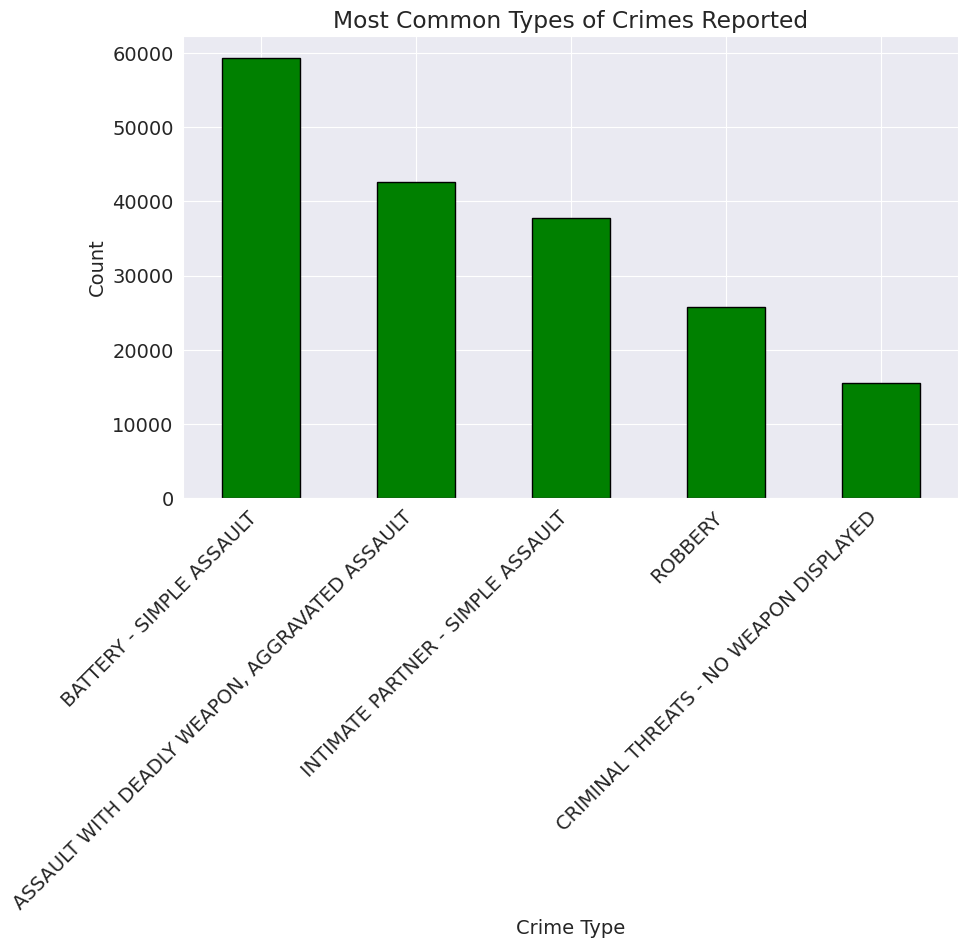

In [ ]:
# Calculate the counts of each crime type
crime_type_counts = crime_final_df['Crime_Code_Desc'].value_counts()

# Plot the most common types of crimes reported
plt.figure(figsize=(10, 6))
ax = crime_type_counts.head().plot(kind='bar', color = 'Green', edgecolor = 'black')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Most Common Types of Crimes Reported')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

Insights:-

- Maximum cases of "Battery-Simple Assault" has been repoted till date, i.e. around 59k.

- These are the Top 5 categories of crime type with maximum no. of cases. Since there are so many categories in the dataset.


In [ ]:
# Calculate the counts of each crime type
crime_type_counts = crime_final_df['Crime_Code_Desc'].value_counts()

# Get the top 5 crimes based on frequency
top_5_crimes = crime_type_counts.nlargest(5)

print('Top 5 Crimes Based on Frequency:')
print(top_5_crimes)


Top 5 Crimes Based on Frequency:
BATTERY - SIMPLE ASSAULT                          59365
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    42616
INTIMATE PARTNER - SIMPLE ASSAULT                 37818
ROBBERY                                           25697
CRIMINAL THREATS - NO WEAPON DISPLAYED            15530
Name: Crime_Code_Desc, dtype: int64


Insights:-

- *From the above Information we can analyse the top 5 crimes based on there frequency*

### Q.3) How does the crime rate vary across different areas or neighborhoods? Can you analyze and compare the crime rates for different areas?

In [ ]:
# Group the data by 'Area_Name' and calculate the crime rate
crime_rate_by_area = crime_final_df.groupby('Area_Name').size().sort_values(ascending=False)

print('Crime Rate by Area:')
print(crime_rate_by_area)

Crime Rate by Area:
Area_Name
77th Street    23133
Central        20105
Southeast      18287
Southwest      16019
Hollywood      15781
Newton         15436
Rampart        14610
Olympic        13837
Pacific        11680
Harbor         10745
Hollenbeck     10114
N Hollywood    10068
Mission         9787
West Valley     9606
Wilshire        9497
Van Nuys        8854
Northeast       8777
Topanga         8573
Foothill        8309
Devonshire      8152
West LA         8109
dtype: int64


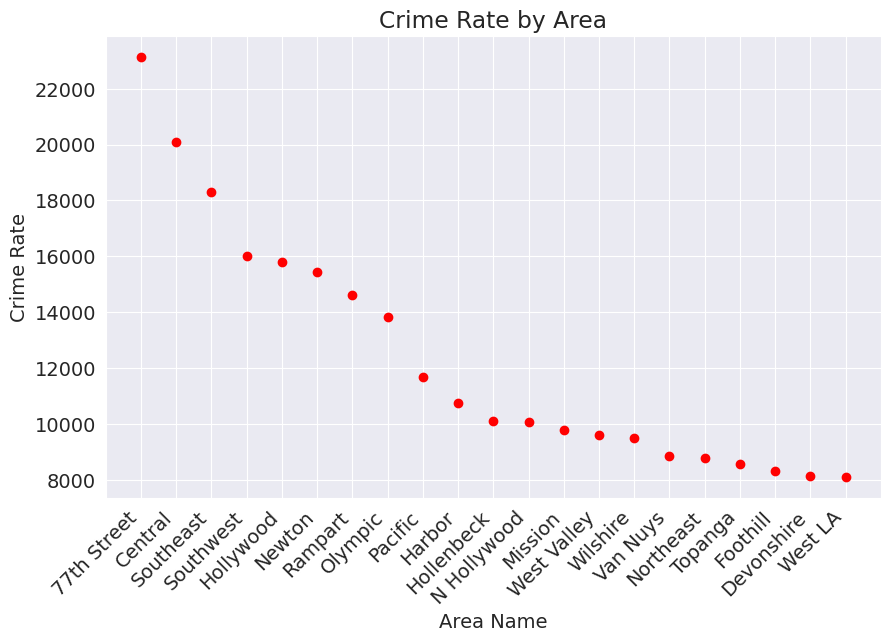

In [ ]:
# Group the data by 'Area_Name' and calculate the crime rate
crime_rate_by_area = crime_final_df.groupby('Area_Name').size().sort_values(ascending=False)

# Create a scatter plot of crime rate by area
plt.figure(figsize=(10, 6))
plt.scatter(crime_rate_by_area.index, crime_rate_by_area.values, color = 'Red')
plt.xlabel('Area Name')
plt.ylabel('Crime Rate')
plt.title('Crime Rate by Area')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

Insights:-

- If we check crime rate by area with the help of Scatter Plot, we can see that the top 3 areas have a pretty huge no. of crime rate as compare to others.

- And the safest amaong all are West LAand Devonshire.

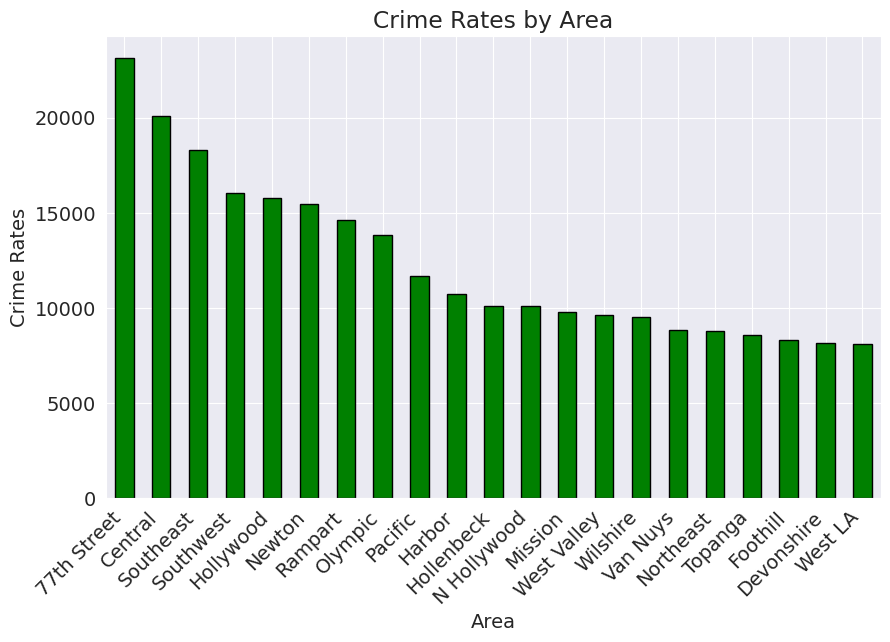

Test Statistic: -27.168474819733994
P-value: 1.133856065701375e-160


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Calculate crime rates by area
crime_rates_by_area = crime_final_df['Area_Name'].value_counts().sort_values(ascending=False)

# Step 2: Visualize the crime rates on a bar chart
plt.figure(figsize=(10, 6))
crime_rates_by_area.plot(kind='bar',color = 'Green', edgecolor = 'black')
plt.xlabel('Area')
plt.ylabel('Crime Rates')
plt.title('Crime Rates by Area')
plt.xticks(rotation=45, ha='right')
plt.show()

# Step 3: Compare specific areas using statistical tests
area1 = '77th Street'
area2 = 'West LA'

area1_crime_rates = crime_final_df[crime_final_df['Area_Name'] == area1]
area2_crime_rates = crime_final_df[crime_final_df['Area_Name'] == area2]

# Using t-test for comparison
t_statistic, p_value = stats.ttest_ind(area1_crime_rates['Crime_Code'], area2_crime_rates['Crime_Code'])

# Step 4: Print the comparison results
print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')



Insights:-

- *From the analysis we can observe that the crime rate in 77th Street is the highest, and West LA have the lowest of the crime rate Almost half of the 77th Street.*

__We have compared the 2 Areas__

- *The test statistic (-27.168474819733994) is a measure of how much the crime rates differ between the two areas. A larger absolute value of the test statistic indicates a greater difference between the groups being compared. In this case, a negative value suggests that one area has a significantly lower crime rate compared to the other.*

- *The p-value (1.133856065701375e-160) is a very small value close to zero. This small p-value indicates that the probability of obtaining the observed difference in crime rates between the two areas, or a more extreme difference, is extremely unlikely under the assumption that there is no true difference between the two areas. In other words, the small p-value suggests strong evidence against the null hypothesis, which states that there is no difference in crime rates between the two areas.*

__*Therefore, based on this output, we can conclude that there is a significant difference in crime rates between the two areas being compared.*__

### Q.4) Is there any specific time period when crimes are more likely to occur? Can you identify any temporal patterns or trends in crime occurrences?

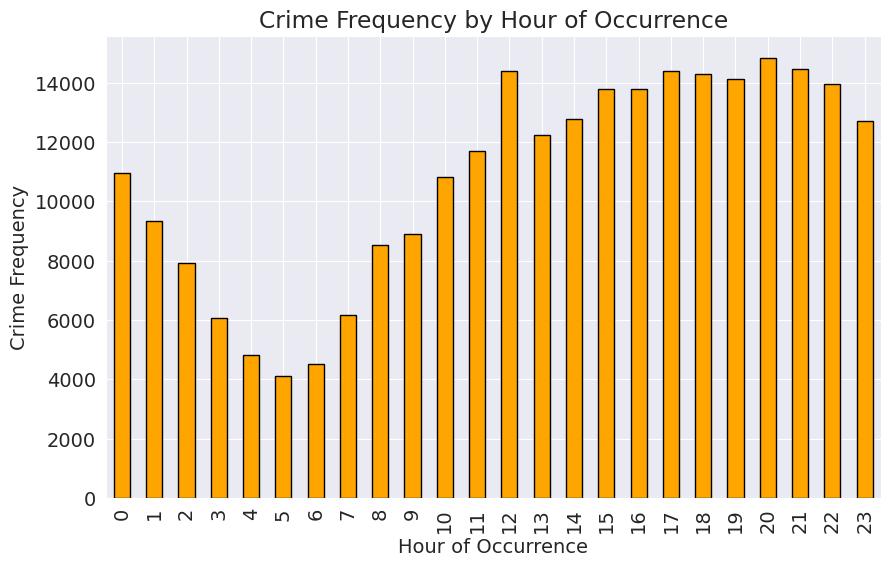

In [ ]:
# Step 1: Convert "Time_Of_Occurance" column to datetime
crime_final_df['Time_Of_Occurance'] = pd.to_datetime(crime_final_df['Time_Of_Occurance'], format='%H:%M:%S').dt.time

# Step 2: Combine the "Date_Of_Occurance" and "Time_Of_Occurance" columns
crime_final_df['Datetime'] = pd.to_datetime(crime_final_df['Date_Of_Occurance'].dt.date.astype(str) + ' ' + crime_final_df['Time_Of_Occurance'].astype(str))

# Step 3: Extract the hour component
crime_final_df['Hour'] = crime_final_df['Datetime'].dt.hour

# Step 4: Group the data by the hour of occurrence
crime_frequency_by_hour = crime_final_df['Hour'].value_counts().sort_index()

# Step 5: Visualize the crime frequency across different hours
plt.figure(figsize=(10, 6))
crime_frequency_by_hour.plot(kind='bar', color = 'Orange', edgecolor = 'Black')
plt.xlabel('Hour of Occurrence')
plt.ylabel('Crime Frequency')
plt.title('Crime Frequency by Hour of Occurrence')
plt.show()


Explanation:-

*If the "Hour of Occurrence" is 14, it means that the crime incident occurred at 2 PM. This information can help in understanding patterns and trends related to crime occurrences during different hours of the day. By analyzing the crime frequency across different hours, we can identify if there are specific time periods when crimes are more likely to occur.*

Insights:-

- Early morning 5:00 am to 7:00 am is the time when crime are repoted less.



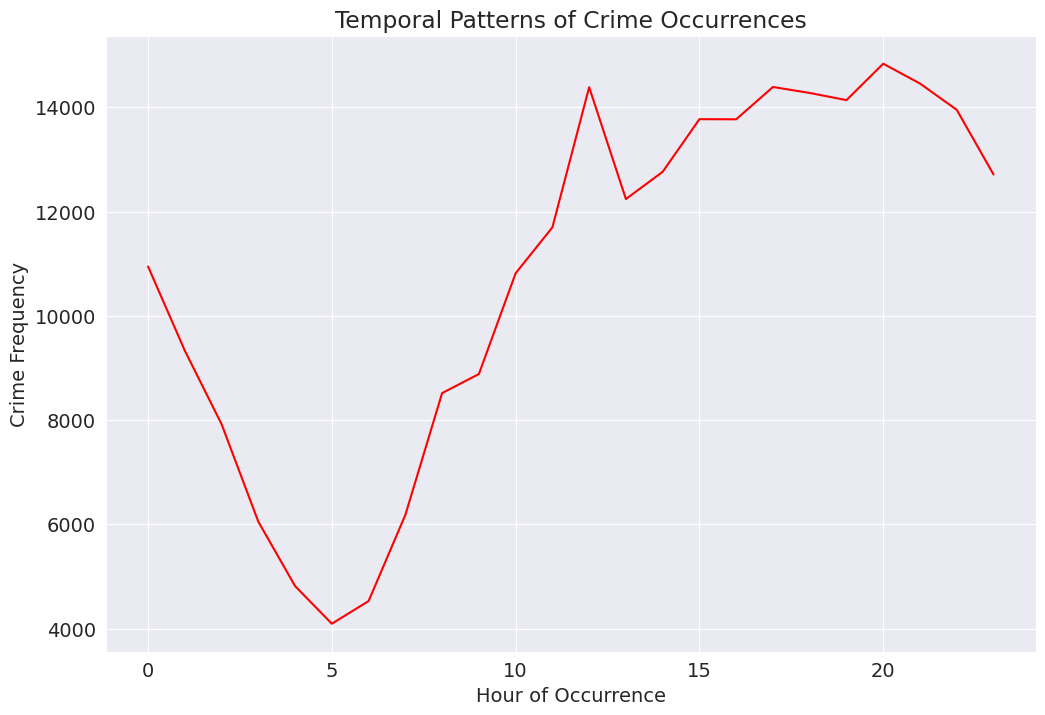

In [ ]:

# Step 1: Grouping and aggregation
hourly_crime_counts = crime_final_df.groupby('Hour').size()

# Step 2: Visualization
hourly_crime_counts.plot(kind='line', color = 'Red')
plt.xlabel('Hour of Occurrence')
plt.ylabel('Crime Frequency')
plt.title('Temporal Patterns of Crime Occurrences')
plt.show()


Insights:-

- *From the above graph we can see that the peak hours of crime are almost all day, from morning 11:00 am to 24:00 midnight are having most crime rates*

### Q.5) Are there any specific days of the week or months of the year when certain types of crimes are more prevalent? Can you analyze and visualize the distribution of crimes by day of the week or month?

In [ ]:

# Step 2: Extract day of the week and month
crime_final_df['Day_of_the_Week'] = crime_final_df['Date_Of_Occurance'].dt.dayofweek
crime_final_df['Month'] = crime_final_df['Date_Of_Occurance'].dt.month

# Step 3: Assign labels
day_of_week_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
month_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

crime_final_df['Day_of_the_Week'] = crime_final_df['Day_of_the_Week'].map(day_of_week_labels)
crime_final_df['Month'] = crime_final_df['Month'].map(month_labels)

# Step 4: Grouping and aggregation
crime_counts_by_day = crime_final_df.groupby('Day_of_the_Week')['Crime_Code_Desc'].value_counts()
crime_counts_by_month = crime_final_df.groupby('Month')['Crime_Code_Desc'].value_counts()



In [ ]:
crime_final_df.head(5)

Date_Reported Date_Of_Occurance Time_Of_Occurance  Area_Name  \
0     2020-01-08        2020-01-08          22:30:00  Southwest   
1     2020-01-02        2020-01-01          03:30:00    Central   
5     2020-01-02        2020-01-01          00:30:00    Central   
10    2020-01-04        2020-01-04          22:00:00    Central   
11    2020-01-05        2020-01-05          09:55:00    Central   

    Reported_Distt_No  Crime_Code                         Crime_Code_Desc  \
0                 377         624                BATTERY - SIMPLE ASSAULT   
1                 163         624                BATTERY - SIMPLE ASSAULT   
5                 163         121                          RAPE, FORCIBLE   
10                192         330                   BURGLARY FROM VEHICLE   
11                111         930  CRIMINAL THREATS - NO WEAPON DISPLAYED   

    Victim_Age Victim_Sex                      Premis_Desc  \
0           36          F           SINGLE FAMILY DWELLING   
1           25          M                         SIDEWALK   
5           25          F  NIGHT CLUB (OPEN EVENINGS ONLY)   
10          29          M                           STREET   
11          35          M                      PARKING LOT   

                                       Weapon_Desc  Status_Desc  \
0   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Adult Other   
1                      UNKNOWN WEAPON/OTHER WEAPON  Invest Cont   
5                      UNKNOWN WEAPON/OTHER WEAPON  Invest Cont   
10                              ROCK/THROWN OBJECT  Invest Cont   
11                                   VERBAL THREAT  Invest Cont   

                                   Location   Latitude   Longitude  Year  \
0   1100 W  39TH                         PL  34.014099 -118.297798  2020   
1    700 S  HILL                         ST  34.045898 -118.254501  2020   
5                           700 S  BROADWAY  34.045200 -118.253403  2020   
10                                     15TH  34.035900 -118.264801  2020   
11   800 N  ALAMEDA                      ST  34.061501 -118.241203  2020   

              Datetime  Hour Day_of_the_Week    Month  
0  2020-01-08 22:30:00    22       Wednesday  January  
1  2020-01-01 03:30:00     3       Wednesday  January  
5  2020-01-01 00:30:00     0       Wednesday  January  
10 2020-01-04 22:00:00    22        Saturday  January  
11 2020-01-05 09:55:00     9          Sunday  January

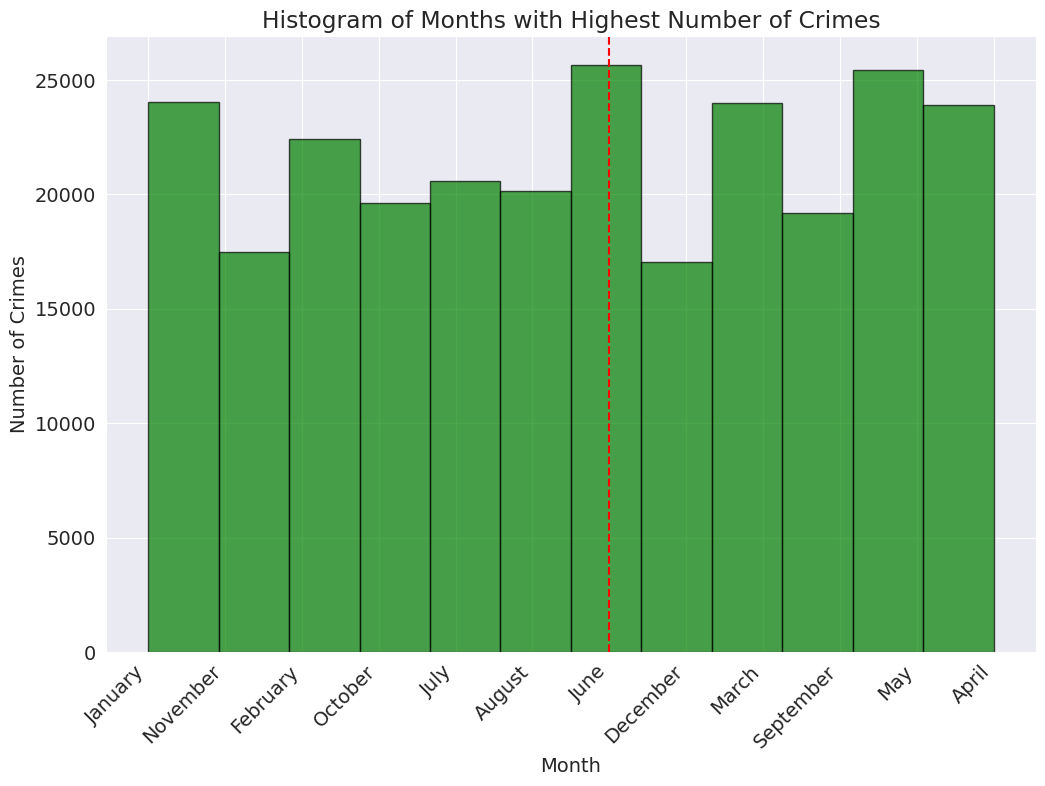

In [ ]:
# Group the data by 'Month' and count the number of crimes in each month
crime_counts_by_month = crime_final_df.groupby('Month').size().sort_values(ascending=False)

# Get the top months with the highest number of crimes
top_months = crime_counts_by_month[crime_counts_by_month == crime_counts_by_month.max()]

# Create a histogram for the top months
plt.hist(crime_final_df['Month'], bins=12,color = 'Green', edgecolor='black', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Histogram of Months with Highest Number of Crimes')
plt.xticks(rotation=45, ha='right')

# Highlight the top months
for month in top_months.index:
    plt.axvline(x=month, color='red', linestyle='--')

# Show the plot
plt.show()

Insights:-

- *From this we can observe that June is the month with highest rate of crime*

### Q.6)Is there any relationship or correlation between specific types of crimes? Can you calculate the correlation coefficients between different crime categories?



In [ ]:
crime_correlation = crime_final_df[["Crime_Code", "Victim_Age", "Victim_Sex"]].corr()
crime_correlation

Crime_Code  Victim_Age
Crime_Code    1.000000    0.040382
Victim_Age    0.040382    1.000000

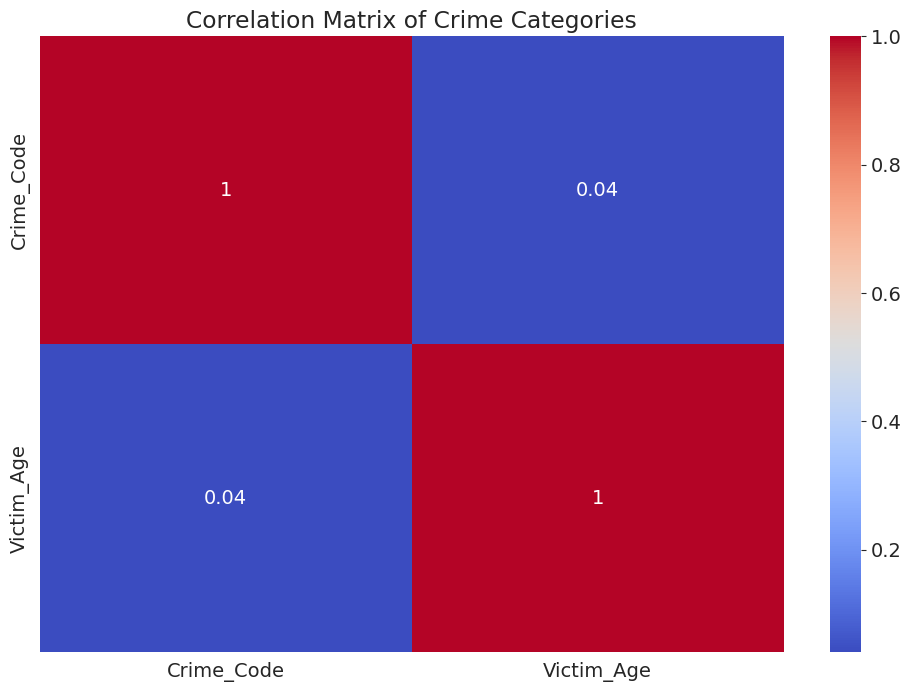

In [ ]:
crime_correlation = crime_final_df[["Crime_Code", "Victim_Age", "Victim_Sex"]].corr()

sns.heatmap(crime_correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Crime Categories")
plt.show()

Insights:-

- *Weak positive correlation: The correlation coefficient of approximately 0.040382 suggests a very weak positive relationship between "Crime_Code" and "Victim_Age".*

- *Limited impact: The correlation coefficient being close to 0 means that changes in "Crime_Code" explain only a small portion of the variability in "Victim_Age". Other factors or variables may have a more significant impact on the age of victims.*

- *Independence: The low correlation coefficient suggests that "Crime_Code" and "Victim_Age" are relatively independent variables.*



In [ ]:
grouped_data = crime_final_df.groupby('Crime_Code_Desc')

#calculate the mean age for each crime category:
mean_age_by_crime = grouped_data['Victim_Age'].mean()

#calculate other statistics like count, min, max, etc.
count_by_crime = grouped_data['Victim_Age'].count()
min_age_by_crime = grouped_data['Victim_Age'].min()
max_age_by_crime = grouped_data['Victim_Age'].max()

#using the agg function
grouped_data_agg = grouped_data['Victim_Age'].agg(['mean', 'count', 'min', 'max'])

#sort the groups based on a specific statistic, like mean age
sorted_data = grouped_data_agg.sort_values(by='mean', ascending=False)

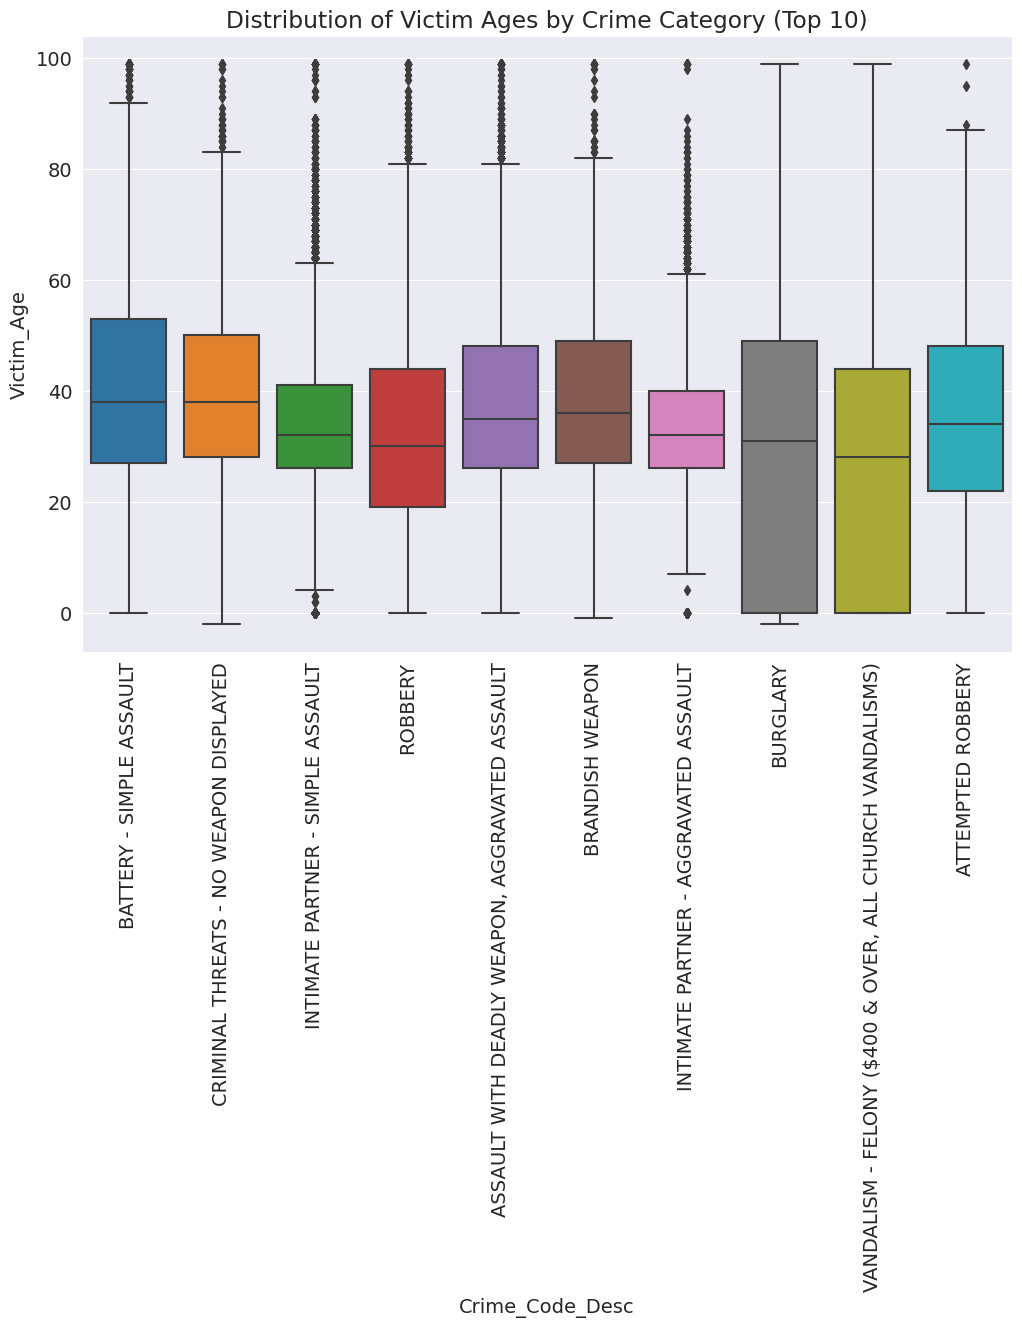

In [ ]:
# Group the data by Crime_Code_Desc and count the occurrences
grouped_data = crime_final_df.groupby('Crime_Code_Desc').size().reset_index(name='Count')

# Sort the categories based on the count
sorted_categories = grouped_data.sort_values('Count', ascending=False).head(10)

# Limit the data to the top 10 categories
data_top_categories = crime_final_df[crime_final_df['Crime_Code_Desc'].isin(sorted_categories['Crime_Code_Desc'])]

# Create a box plot using seaborn
sns.boxplot(x='Crime_Code_Desc', y='Victim_Age', data=data_top_categories)

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Add a title
plt.title('Distribution of Victim Ages by Crime Category (Top 10)')

# Display the plot
plt.show()

Insights:-

- *The Above data represents the top crime categories. Here we can understand by the graph like "Battery - Simple Assault" category is most common between the age group of 27-55.*

### Q.7) Are there any specific demographics or victim attributes associated with certain types of crimes? Can you analyze and identify any patterns based on victim age, gender, or other characteristics?




In [ ]:
male_count = crime_final_df[crime_final_df['Victim_Sex'] == 'Male'].shape[0]
female_count = crime_final_df[crime_final_df['Victim_Sex'] == 'Female'].shape[0]

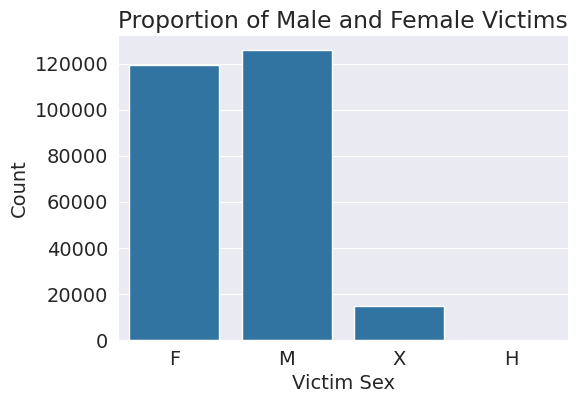

In [ ]:
# Create the FacetGrid
grid = sns.FacetGrid(crime_final_df, height=4, aspect=1.5)

# Specify the chart type and layout
grid.map(sns.countplot, 'Victim_Sex')

# Add labels to the chart
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.title('Proportion of Male and Female Victims')

# Display the chart
plt.show()

Insights:-

- *From this we can concluse that most of the victims are Male i.e. more than 1.25k. After that Female with less than 120K. FOr the rest, Gender is unknown*

### Q.8) Are there any specific areas or neighborhoods that exhibit higher crime rates? Can you identify crime hotspots or areas that need more attention?

In [ ]:
area_crime_counts = crime_final_df['Area_Name'].value_counts()
area_crime_counts_sorted = area_crime_counts.sort_values(ascending=False)
area_crime_counts_sorted

77th Street    23133
Central        20105
Southeast      18287
Southwest      16019
Hollywood      15781
Newton         15436
Rampart        14610
Olympic        13837
Pacific        11680
Harbor         10745
Hollenbeck     10114
N Hollywood    10068
Mission         9787
West Valley     9606
Wilshire        9497
Van Nuys        8854
Northeast       8777
Topanga         8573
Foothill        8309
Devonshire      8152
West LA         8109
Name: Area_Name, dtype: int64

In [ ]:
import folium
from folium.plugins import HeatMap
# Create a new map centered on the average latitude and longitude
crime_map = folium.Map(location=[crime_final_df['Latitude'].mean(), crime_final_df['Longitude'].mean()], zoom_start=9)

# Create a list of crime locations
crime_locations = crime_final_df[['Latitude', 'Longitude']].values.tolist()

# Add heatmap layer to the map with modified parameters
HeatMap(crime_locations, radius=30, blur=15).add_to(crime_map)

# Display the map
crime_map.save('heatmap.html')
crime_map

Output hidden; open in https://colab.research.google.com to view.

Insights:-

- *The Heat Map shows the specific areas or neighborhoods that exhibit higher crime rates, the darker the region, more crime is there.*

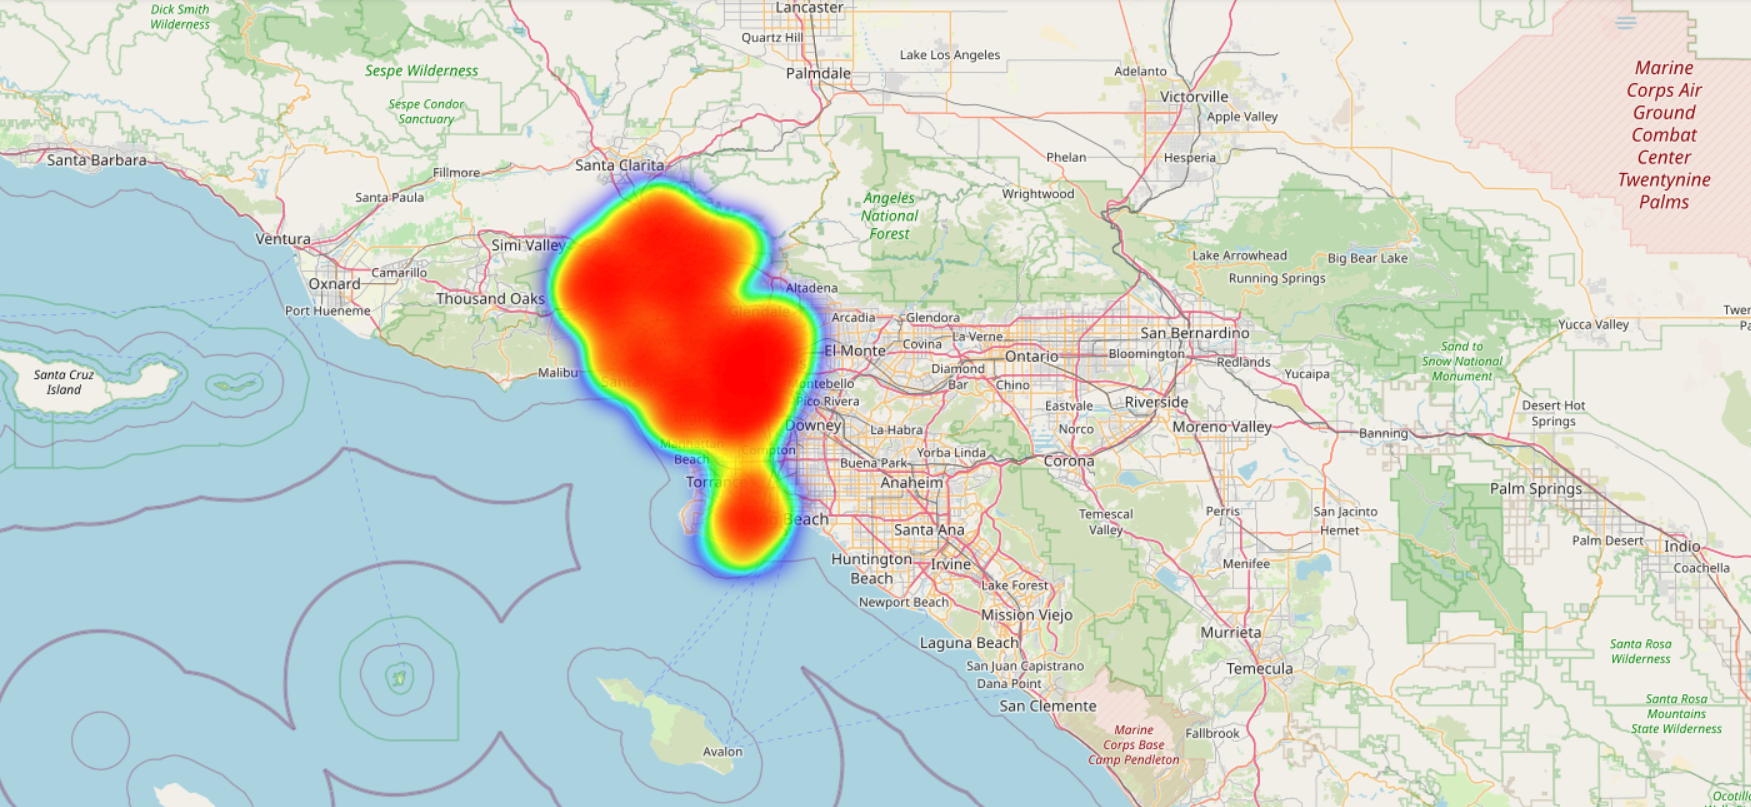

## Summary & Conclusion




*In the above analysis we used various visualization techniques Python, Pandas, Matplotlib and Seaborn, Plotly to calculate statistics. From which we got many insights.*

*We performed analysis on 2,59,479 rows of data with more than 15 columns. Few columns added later and merged.*

__Key matices:-__
- Average age of the Victim is :-  34.640876525653326
- Total No. of crime reported till date :- 259479
- Highest No. of crime Occured in the Year :-  2022
- 77th Street have the most no. of crimes.
- Overall Crime Rate: 64869.75 per year

*From the above Data Analysis and Visualisation we can conclude that most of the regions of Los-Angeles are with higher crime rate. The crime rate started increasing from the year 2020, In the Year 2022 the crime rate was on its peak and then dropped. One reason could be because there was Elections and change of Government in the state. This major change Disturbed the whole Law and Order situation.*


## Future Work

- Further analysis on crime rates of other popular cities of USA.
- Comparing the results to get top crime cities and top crime free cities.
- Can compare the analysis with other countries crime datasets.
- Create and link analysis to dashboards

## References

- Kaggle Dataset [https://www.kaggle.com/datasets/nathaniellybrand/los-angeles-crime-dataset-2020-present]

- Jovian tutorials
  
  *Analyzing Tabular Data with Pandas* 
  
  *Data Visualization using Python, Matplotlib and Seaborn*
  
  *Advanced Data Analysis Techniques with Python & Pandas*
  
  *Exploratory Data Analysis Case Study - Stack Overflow Developer Survey*
  
  *Interactive Visualization with Plotly*

- Geeks for Geeks [https://www.geeksforgeeks.org/]

- StackOverFlow [https://stackoverflow.com/]
